In [74]:
import pandas as pd
import numpy as np
import os

In [75]:
%run sqlite_execution.py
db1 = DB_V1()
# db1.drop_duplicates()
# db1.drop_unuseable_images(commit=True)
# db1.cur.execute("UPDATE captchas_v1 SET captcha_string = 'headphones' WHERE captcha_string = 'Please click each image containing headphones'")
# db1.cur.execute("UPDATE captchas_v1 SET file_path = REPLACE(file_path, 'Please click each image containing headphones', 'headphones')")
# db1.commit()
info = db1.get_info()
info

,total,solved,unsolved
bonsai tree,1235,984,251
laptop,2005,591,1414
tree,2008,527,1481
headphones,2003,515,1488
flower,1670,500,1170
cup of orange juice,2002,415,1587
car,1493,359,1134
motorcycle,1335,309,1026
violin,249,249,0
helicopter,242,242,0


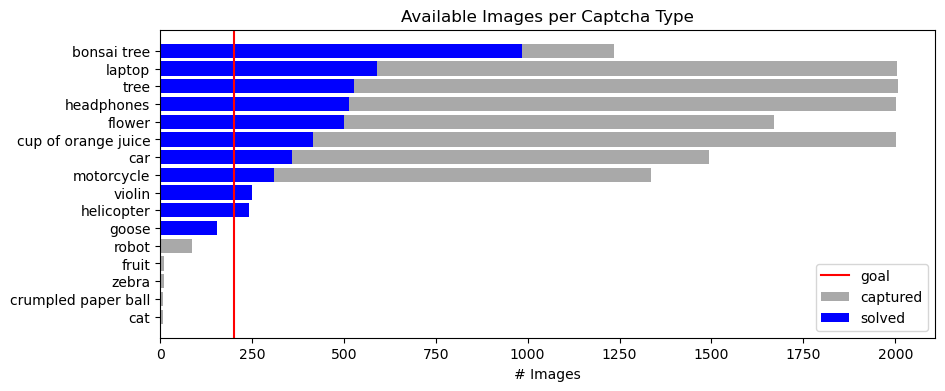

In [76]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [77]:
%run pytorch_training.py
# train_model_on_captcha_string(db1, "laptop", save=True, epochs=50)
train_models_on_all_captcha_strings(db1, threshold=200, save=True, only_updated=False, epochs=50, augment_images=True)

Training model on bonsai tree with 984 samples...
Training model on bonsai tree...
Fount 984 useable images
x shape: (984, 3, 128, 128)
y shape: (984, 1)
train size: 736, test size: 248
single element shape: torch.Size([3, 128, 128])


KeyboardInterrupt: 

In [ ]:
model_info = db1.get_model_info()
model_info

,date,path,samples,training_samples,testing_samples,accuracy,better_than_90,better_than_95
bonsai tree,2023-08-18,bonsai tree/23-230_01,1720,1472,248,0.959677,0.999856,0.797654
car,2023-08-18,car/23-230_01,615,512,103,0.970874,0.998503,0.893542
cup of orange juice,2023-08-18,cup of orange juice/23-230_02,719,608,111,0.990991,0.999992,0.996632
flower,2023-08-18,flower/23-230_01,868,736,132,0.931818,0.920240,0.216006
goose,2023-08-16,goose/23-228_01,131,96,35,0.828571,0.131636,0.007252
headphones,2023-08-18,headphones/23-230_01,899,768,131,0.954198,0.992452,0.643914
helicopter,2023-08-18,helicopter/23-230_01,418,352,66,0.878788,0.338588,0.016911
laptop,2023-08-18,laptop/23-230_06,1023,864,159,0.937107,0.962150,0.273802
motorcycle,2023-08-18,motorcycle/23-230_01,533,448,85,1.000000,1.000000,1.000000
tree,2023-08-18,tree/23-230_02,911,768,143,0.937063,0.954912,0.287698


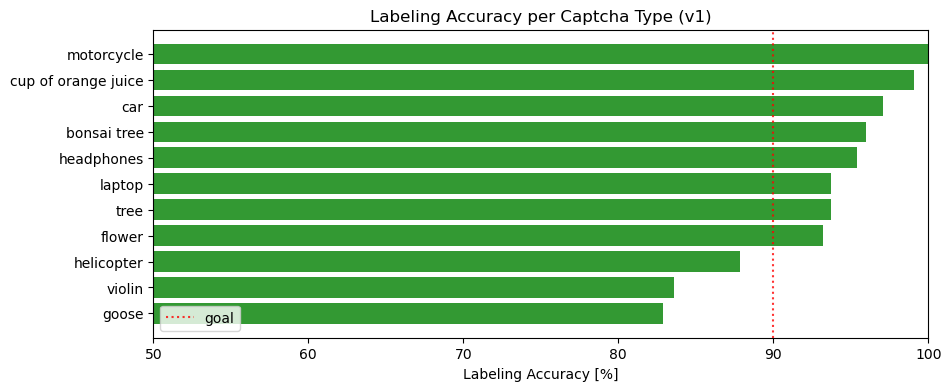

In [ ]:
%run visualizer.py
plot_model_accuracy(model_info)

In [ ]:
db1.load_models_into_src(threshold=0.9)

bonsai tree bonsai tree/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//bonsai tree
car car/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//car
cup of orange juice cup of orange juice/23-230_02
File copied and renamed to: ../src/hcaptcha_solver/models//cup of orange juice
flower flower/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//flower
headphones headphones/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//headphones
laptop laptop/23-230_06
File copied and renamed to: ../src/hcaptcha_solver/models//laptop
motorcycle motorcycle/23-230_01
File copied and renamed to: ../src/hcaptcha_solver/models//motorcycle
tree tree/23-230_02
File copied and renamed to: ../src/hcaptcha_solver/models//tree


In [ ]:
assert 1 == 0 # to avoid execution of code below

AssertionError: 

In [ ]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db1, urls[0], count=1000, collect_v2=True, limit=2000)

Loaded Website
Launched hCaptcha
Switched to Captcha
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
cup of orange juice: Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
cup of orange juice: Captcha string is limited, skipping
Captcha V1
cup of orange juice: Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
cup of orange juice: Captcha string is limited, skipping
Captcha V1
headphones      : Captcha string is limited, skipping
Captcha V1
headphones    

KeyboardInterrupt: 

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db1)

In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db1)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))